<a href="https://www.kaggle.com/code/samithsachidanandan/image-classification-with-neural-networks-in-pytho?scriptVersionId=266368433" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras import datasets, layers, models   

2025-10-07 14:39:43.388505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759847983.621850      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759847983.685570      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(training_images, training_labels), (test_images, test_labels) = datasets.cifar10.load_data()
training_images, test_images = training_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

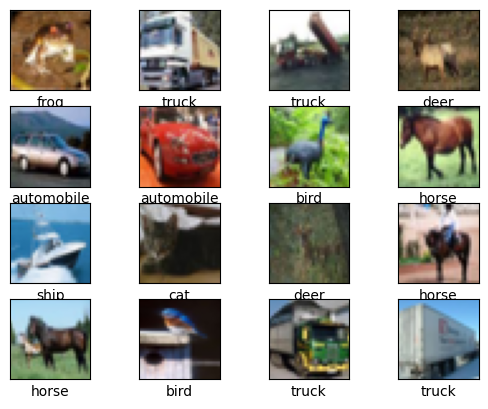

In [4]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [5]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
test_images = test_images[:4000]
test_labels = test_labels[:4000]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-07 14:40:35.595137: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.2532 - loss: 1.9907 - val_accuracy: 0.4198 - val_loss: 1.6102
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4837 - loss: 1.4287 - val_accuracy: 0.5282 - val_loss: 1.3209
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5430 - loss: 1.2623 - val_accuracy: 0.5735 - val_loss: 1.2143
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6027 - loss: 1.1162 - val_accuracy: 0.5817 - val_loss: 1.1851
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6429 - loss: 1.0268 - val_accuracy: 0.6000 - val_loss: 1.1396
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6637 - loss: 0.9671 - val_accuracy: 0.6090 - val_loss: 1.1077
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6907 - loss: 0.8891 - val_accuracy: 0.6335 - val_loss: 1.0641
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7110 - loss: 0.8213 - 

In [7]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6428 - loss: 1.0380
Loss: 1.0750136375427246
Accuracy: 0.6359999775886536


In [8]:
model.save('image_classifier_model.h5')

In [9]:
model = models.load_model('image_classifier_model.h5')

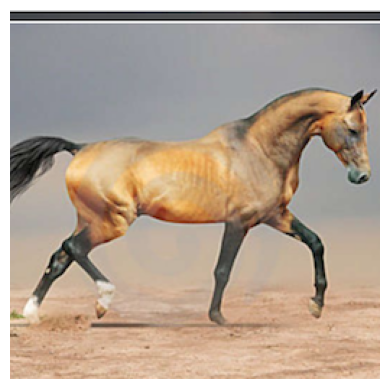

In [10]:
img = cv.imread('/kaggle/input/horse-breeds/01_015.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
plt.axis('off')
plt.show()


In [11]:
prediction = model.predict(np.array([cv.resize(img, (32, 32))]) / 255.0)
index = np.argmax(prediction)
print(f"Prediction is {class_names[index]} with {prediction[0][index] * 100}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Prediction is horse with 79.43876385688782% confidence
